In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import re
import pythainlp
import pickle

# Data Cleaning

In [49]:
noti_dataset = pd.read_csv('mobile_app_notifications.csv')
print("Dimension of dataset\n", noti_dataset.shape, "\n")
print(noti_dataset)

Dimension of dataset
 (1130, 2) 

     label                                            content
0      ham  คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ขอ...
1      ham  หมายเลข: 09116240327514498 อยู่ในสถานะ 'เสร็จส...
2      ham  หมายเลข: 09116240327514498 พนักงานกำลังน้ำ สิน...
3      ham  7-Delivery: เนื่องจากขณะนี้มีออเดอร์เป็นจำนวนม...
4      ham  หมายเลข: 09116240327514498 อยู่ในสถานะ 'จัดของ...
...    ...                                                ...
1125  spam  เที่ยงคืน แจกอีก5,000.- เก็บด่วน! ช้อปดีลเด็ด ...
1126  spam         4.4 มาแล้ว! ลดโหด โค้ด 50% วันนี้วันเดียว!
1127  spam                        โค้ดลด 50% 9 โมง » เก็บด่วน
1128  spam  Shopee Live! watch cintage.official's live: co...
1129  spam                      โค้ดเด็ด! 4.4 ลด 50% ถึงตีสอง

[1130 rows x 2 columns]


In [50]:
encoder = LabelEncoder() # Encode label to integer (0, 1)
noti_dataset['label'] = encoder.fit_transform(noti_dataset['label']) # Encode label to integer 
print(noti_dataset) # Show dataset after encoding

      label                                            content
0         0  คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ขอ...
1         0  หมายเลข: 09116240327514498 อยู่ในสถานะ 'เสร็จส...
2         0  หมายเลข: 09116240327514498 พนักงานกำลังน้ำ สิน...
3         0  7-Delivery: เนื่องจากขณะนี้มีออเดอร์เป็นจำนวนม...
4         0  หมายเลข: 09116240327514498 อยู่ในสถานะ 'จัดของ...
...     ...                                                ...
1125      1  เที่ยงคืน แจกอีก5,000.- เก็บด่วน! ช้อปดีลเด็ด ...
1126      1         4.4 มาแล้ว! ลดโหด โค้ด 50% วันนี้วันเดียว!
1127      1                        โค้ดลด 50% 9 โมง » เก็บด่วน
1128      1  Shopee Live! watch cintage.official's live: co...
1129      1                      โค้ดเด็ด! 4.4 ลด 50% ถึงตีสอง

[1130 rows x 2 columns]


In [51]:
noti_dataset

,label,content
0,0,คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ขอ...
1,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'เสร็จส...
2,0,หมายเลข: 09116240327514498 พนักงานกำลังน้ำ สิน...
3,0,7-Delivery: เนื่องจากขณะนี้มีออเดอร์เป็นจำนวนม...
4,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'จัดของ...
...,...,...
1125,1,"เที่ยงคืน แจกอีก5,000.- เก็บด่วน! ช้อปดีลเด็ด ..."
1126,1,4.4 มาแล้ว! ลดโหด โค้ด 50% วันนี้วันเดียว!
1127,1,โค้ดลด 50% 9 โมง » เก็บด่วน
1128,1,Shopee Live! watch cintage.official's live: co...


In [52]:
print("missing values : \n", noti_dataset.isnull().sum(), "\n") # check missing values
print("duplicated values: ", noti_dataset.duplicated().sum()) # check duplicated values

missing values : 
 label      0
content    0
dtype: int64 

duplicated values:  74


In [53]:
noti_dataset = noti_dataset.drop_duplicates(keep="first")
noti_dataset = noti_dataset.reset_index(drop=True)
print("duplicated values: ", noti_dataset.duplicated().sum())
print("Dimension of dataset: ", noti_dataset.shape, "\n")
noti_dataset

duplicated values:  0
Dimension of dataset:  (1056, 2) 



,label,content
0,0,คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ขอ...
1,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'เสร็จส...
2,0,หมายเลข: 09116240327514498 พนักงานกำลังน้ำ สิน...
3,0,7-Delivery: เนื่องจากขณะนี้มีออเดอร์เป็นจำนวนม...
4,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'จัดของ...
...,...,...
1051,1,"เที่ยงคืน แจกอีก5,000.- เก็บด่วน! ช้อปดีลเด็ด ..."
1052,1,4.4 มาแล้ว! ลดโหด โค้ด 50% วันนี้วันเดียว!
1053,1,โค้ดลด 50% 9 โมง » เก็บด่วน
1054,1,Shopee Live! watch cintage.official's live: co...


# Analysis

In [54]:
print("Distribution of the dataset\n", noti_dataset['label'].value_counts(normalize=True))

Distribution of the dataset
 label
1    0.74053
0    0.25947
Name: proportion, dtype: float64


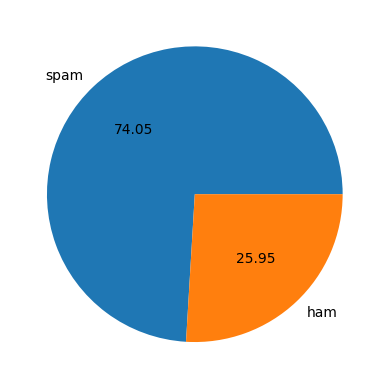

In [55]:
plt.pie(noti_dataset['label'].value_counts(), labels=['spam','ham'],autopct="%0.2f")
plt.show()

# Data Preprocessing

In [56]:
def removeAcronym(string: str, mapping_file: str) -> str:
    # Read mappings from the mapping file
    mappings = {}
    with open(mapping_file, 'r', encoding='utf-8') as f:
        for line in f:
            key, value = line.strip().split(',')
            mappings[key] = value
    
    # Tokenize the string
    tokens = pythainlp.word_tokenize(string)
    
    # Swap strings based on mappings
    for i, token in enumerate(tokens):
        if token.lower() in mappings:
            tokens[i] = mappings[token.lower()]
        # Extra case for มีนาคม
        if token == "มี" and tokens[i+1] == "." and tokens[i+2] == "ค" and tokens[i+3] == ".":
            tokens[i] = "มีนาคม"
            for j in range(3):
                tokens.pop(i+1)
    
    modified_text = ''.join(tokens)
    return modified_text

monthList = ['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน', 'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม']

def dateSubstitute(string: str) -> str:
    tokens = pythainlp.word_tokenize(string)
    i = 0
    while i < len(tokens):
        if tokens[i].isdigit() and i + 2 < len(tokens) and tokens[i + 2] in monthList:
            tokens[i] = "date"
            if i + 4 < len(tokens):
                tokens.pop(i + 4)
            tokens.pop(i + 2)
        i += 1
    modified_text = ''.join(tokens)
    return modified_text

custom_stopwords_list = ["ส่ง", "ให้", "อยู่", "ได้รับ"]

def removeStopWord(string: str) -> str:
    tokens = pythainlp.word_tokenize(string)
    thai_stopwords = pythainlp.corpus.thai_stopwords()
    custom_stopwords = [word for word in thai_stopwords if word not in custom_stopwords_list]
    
    filtered_tokens = [token for token in tokens if token not in custom_stopwords]
    modified_text = ''.join(filtered_tokens)
    return modified_text

In [57]:
def transformContent(string: str) -> str:
    cleanedString = removeAcronym(string, 'acronyms.txt') # Remove acronym
    cleanedString = dateSubstitute(cleanedString) # Date Substitution
    cleanedString = re.sub(r'[^\u0E00-\u0E7F\w]', '', cleanedString) # Remove non-Thai / alphanumeric characters using unicode range
    cleanedString = cleanedString.lower()
    cleanedString = removeStopWord(cleanedString) # Remove stop words
    return cleanedString    

sample = "โค้ดพิเศษ สำหรับคุณ! ลดเพิ่ม 250.- สำหรับลูกค้าใหม่ Ray-Ban TH Official Store © เมื่อช้อปในวันที่ 3 เม.ย. 67 นี้ วันเดียวเท่านั้น! ใช้โค้ดเลย"

print("Original sample: ", sample)
print("Transformed sample: ", transformContent(sample))

Original sample:  โค้ดพิเศษ สำหรับคุณ! ลดเพิ่ม 250.- สำหรับลูกค้าใหม่ Ray-Ban TH Official Store © เมื่อช้อปในวันที่ 3 เม.ย. 67 นี้ วันเดียวเท่านั้น! ใช้โค้ดเลย
Transformed sample:  โค้ดพิเศษสำหรับลด250สำหรับลูกค้าraybanthofficialstoreช้อปวันที่dateโค้ด


In [58]:
noti_dataset['transformed_content'] = noti_dataset['content'].apply(transformContent)
noti_dataset

,label,content,transformed_content
0,0,คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ขอ...,คนขับส่งอาหารเรียบร้อยดูใบเสร็จรับเงินหมายเลขส...
1,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'เสร็จส...,หมายเลข09116240327514498อยู่สถานะสมบูรณ์date15...
2,0,หมายเลข: 09116240327514498 พนักงานกำลังน้ำ สิน...,หมายเลข09116240327514498พนักงานน้ำสินค้าส่งกรุ...
3,0,7-Delivery: เนื่องจากขณะนี้มีออเดอร์เป็นจำนวนม...,7deliveryออเดอร์จำนวนมากพนักงานดำเนินการจัดส่ง...
4,0,หมายเลข: 09116240327514498 อยู่ในสถานะ 'จัดของ...,หมายเลข09116240327514498อยู่สถานะdate1428นาฬิกา
...,...,...,...
1051,1,"เที่ยงคืน แจกอีก5,000.- เก็บด่วน! ช้อปดีลเด็ด ...",เที่ยงคืนแจก5000ด่วนช้อปดีลเด็ด44จำกัดเวลาตี2
1052,1,4.4 มาแล้ว! ลดโหด โค้ด 50% วันนี้วันเดียว!,44ลดโหดโค้ด50
1053,1,โค้ดลด 50% 9 โมง » เก็บด่วน,โค้ดลด509โมงด่วน
1054,1,Shopee Live! watch cintage.official's live: co...,shopeelivewatchcintageofficialslivecode50200บา...


# Model Building

In [59]:
class MultinomialNaiveBayes:
    def __init__(self):
        self.class_prior = None # P(y)
        self.feature_prob = None # P(x|y)
        self.classes = None # Unique classes
    
    def fit(self, X, y):
        """
        Prior : P(y) = count(y) / count(Y) [ Y = all samples, y = specific class ]
        Likelihood : P(x|y) = count(x, y) + 1 / count(y) + |X| [ X = all features, x = specific feature ]
        """
        self.classes = np.unique(y)
        self.class_prior = np.zeros(len(self.classes)) 
        self.feature_prob = np.zeros((len(self.classes), X.shape[1])) # 

        for i, c in enumerate(self.classes): #  
            X_c = X[y == c] # Get samples with class c
            self.class_prior[i] = X_c.shape[0] / X.shape[0] # P(y) = count(y) / count(Y)
            self.feature_prob[i] = (np.sum(X_c, axis=0) + 1) / (np.sum(X_c) + X.shape[1]) # P(x|y) = count(x, y) + 1 / count(y) + |X|

    def predict_proba(self, X):
        """
        Calculate the posterior probability for each class given the input features X.
        
        Parameters:
        - X: Input features, shape (n_samples, n_features)
        
        Returns:
        - posterior probabilities: Probability of each class for each sample in X, shape (n_classes, n_samples)
        """
        # Compute the logarithm of the likelihood of each feature given each class, then transpose the result
        log_likelihood = np.log(self.feature_prob + 1e-9) @ X.T  # log(P(x|y)) * X (dot product [ @ : matrix multiplication ])
        
        # Add the logarithm of the prior probability of each class to the likelihood
        log_likelihood += np.log(self.class_prior.reshape(-1, 1))
        
        # Normalize the log-likelihoods by subtracting the maximum log-likelihood value to avoid numerical instability
        log_likelihood -= np.max(log_likelihood, axis=0)
        
        # Exponentiate the normalized log-likelihoods to get the likelihoods 
        likelihood = np.exp(log_likelihood)
        return likelihood / np.sum(likelihood, axis=0) # Normalize the likelihoods to get the posterior probabilities


    def predict(self, X):
        """
        Predict the class with the highest probability by finding the argmax of the posterior probability.
        """
        return np.argmax(self.predict_proba(X), axis=0)
    
    def accuracy_score(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        total_samples = len(y_true)
        accuracy = correct_predictions / total_samples
        return accuracy
    
    def precision_score(self, y_true, y_pred, pos_label=0):
        true_positives = np.sum((y_true == pos_label) & (y_pred == pos_label))
        predicted_positives = np.sum(y_pred == pos_label)
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        return precision

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(noti_dataset['transformed_content']).toarray()
y = noti_dataset['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((844, 2000), (212, 2000), (844,), (212,))

In [61]:
h = MultinomialNaiveBayes()
h.fit(X_train, y_train)

In [62]:
predictions = h.predict(X_test)
print("Predicted classes:", predictions)

Predicted classes: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0]


In [63]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy score:", accuracy)

# Calculate precision score
precision_score = precision_score(y_test, predictions)
print("Precision score:", precision_score) 

Accuracy score: 0.9339622641509434
Precision score: 0.9176470588235294


In [64]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(h, open('model.pkl','wb'))

In [65]:
import pickle
tfidf = pickle.load(open('tfidf.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [66]:
test1 = "ให้คะแนนความอร่อยร้านนี้กัน คำสั่งซื้อ 240403-JJ-5443 เสร็จสมบูรณ์แล้ว กรุณาให้คะแนนความพึงพอใจร้านนี้"
test2 = "ใบเสร็จรับเงิน (E-Receipt) คนขับส่งอาหารเรียบร้อยแล้ว ดูใบเสร็จรับเงิน ของหมายเลขคำสั่งซื้อ 240403-JJ-5443"
test3 = "สถานะคำสั่งซื้อ คำสั่งซื้อ 240403-JJ-5443 ยอด 398.36 บาท ชำระเงินสำเร็จแล้ว หากคำสั่งซื้อไม่ สมบูรณ์ คุณจะได้รับเงินคืนโดยเร็ว "
test4 = "เริ่มหิวแล้ว มาสั่งของอร่อยกัน! ค่าส่งแค่ 5 กม. 5 บาท* กดสั่งจากร้านแถบ สีชมพูได้เลย ตลอดเดือนนี้ รีบกดสั่งด่วน!"
test5 = "4.4 อย่าพลาดโปรส่งของด่วน ลดสูง... ใส่โค้ด EXP44 ลดสูงสุด 44.-* x4 ครั้ง ไม่มี ขั้นต่ำ ส่งของเร็ว ถูกใจทั้งผู้รับ ผู้ส่ง เรียกส่งของเลย!"
test6 = "พัสดุของคุณไม่มีค่าจัดส่ง แจกคูปองส่งฟรีสองใบ คลิก"
test7 = "จ๊าบของแท้ โค้ด 800MALL ลดเลย 800.-"
test8 = "เก็บโค้ดด่วน! 4.4 ส่งฟรี* ทั้งแอป"
test9 = "ไป 7-Eleven อย่าลืมยืนยันตัวตน เพียงแสดงบัตรประชาชนและบาร์โค้ด รับฟรีถึง 50.- ที่ภารกิจทรูมันนี่ คลิก"
test10 = "เริ่มเลอ! 4.4 แจกโค้ด ลด รวมไอเทมเด็ด พร้อมโค้ดลดสูงสุด 160.-* รีบช้อปด่วน"
transformedString = transformContent(test1)
vector_input = tfidf.transform([transformedString])
result = model.predict(vector_input)
result

array([0])